In [170]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import gif
from scipy.stats import norm
from scipy.stats import poisson


Implement the Gibbs sampler for normal distibution in the following cell.

In [171]:
def gibbs_sampler(initial_values, y, w, alfa, beta, num_posterior_samples):
    n = len(y)

    mu_samples = np.zeros((num_posterior_samples, 1))
    tau_samples = np.zeros((num_posterior_samples, 1))
    mu_samples[0] = initial_values[0]
    tau_samples[0] = initial_values[1]

    # TODO: Implement the Gibbs sampler for Normal distribution


    sum_y = np.sum(y)

    t = 0
    while (t+1) < num_posterior_samples:
        
        # for tau posterior
        tau_posterior_sample = np.random.gamma(shape=(alfa + n/2), scale=1/((1/2) * np.sum( (y-mu_samples[t])**2 ))) # är beta scale eller rate? ska vara t+1!
        tau_samples[t+1] = tau_posterior_sample
        # for mu posterior:
        mu_posterior_sample = np.random.normal(loc=(tau_samples[t+1] / (n*tau_samples[t+1] + w)) * sum_y, scale=np.sqrt(1/(n*tau_samples[t+1] + w)))
        mu_samples[t+1] = mu_posterior_sample

        t += 1

    return mu_samples, tau_samples
    

In [172]:
# To create a gif image
@gif.frame
def plot_samples_normal(x, true_pdf, estimated_pdf, num_samples, title="Gibbs Sampling Normal dist",):
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    
    # Plot the true distribution
    ax.plot(x, true_pdf, label = "True distribution")
    
    # Plot the estimated distribution after each iteration
    ax.plot(x, estimated_pdf, label = "Estimated distribution after "+str(num_samples)+" iterations")
    
    # Keeping the axes scales same for good gifs
    # ax.set_xlim(xlims)
    ax.set_ylim((0, 0.3))
    
    
    ax.legend(loc='upper left')
    ax.set_title(title)

In [173]:
#Simulate data to check the Gibbs sampler
n = 100 #sample size
sigma_true = 1/np.sqrt(2)
sigma2_true = sigma_true**2
mu_true = 5
np.random.seed(4)
y = mu_true + np.random.randn(n)*sigma_true
print(sigma2_true) # VARIANCE ASKED FOR 1/2

0.4999999999999999


In [174]:
initial_values = [1,2]
alpha = 1
beta = 1
w = 1
num_posterior_samples = 50#500

mu_samples,tau_samples = gibbs_sampler(initial_values, y, w, alpha, beta, num_posterior_samples)

c:\Users\Richa\Documents\Advanced probabilistic machine learning\APML\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Richa\Documents\Advanced probabilistic machine learning\APML\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


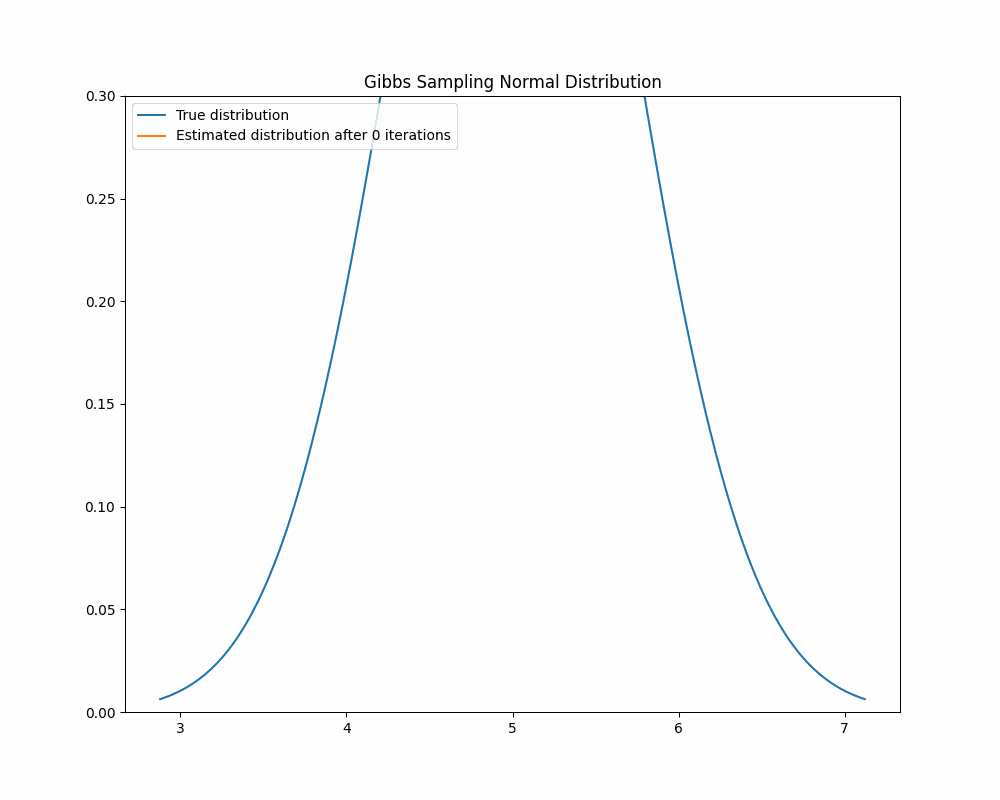

In [175]:
# Creating the gif
x = np.linspace(mu_true-3*sigma_true, mu_true + 3*sigma_true, 1000 )
true_pdf = norm.pdf(x, mu_true, sigma_true)

frames = []
for num_samples in range(len(mu_samples)):
    mu = np.mean(mu_samples[:num_samples])
    sigma = np.sqrt(np.mean(tau_samples[:num_samples]))
    estimated_pdf = norm.pdf(x, mu, sigma)
    

    frame = plot_samples_normal(x, true_pdf, estimated_pdf, num_samples,title="Gibbs Sampling Normal Distribution")
    frames.append(frame)

gif.save(frames, "gibbs_normal.gif", duration=150)
Image(filename="gibbs_normal.gif")

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\259071312.py:7: SyntaxWarning: invalid escape sequence '\m'
  axs[0].axvline(mu_true, color='gray', linestyle='--', label="$\mu_{true}$")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\259071312.py:9: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title("Histogram of $\mu$-samples")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\259071312.py:10: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_xlabel("$\mu$")


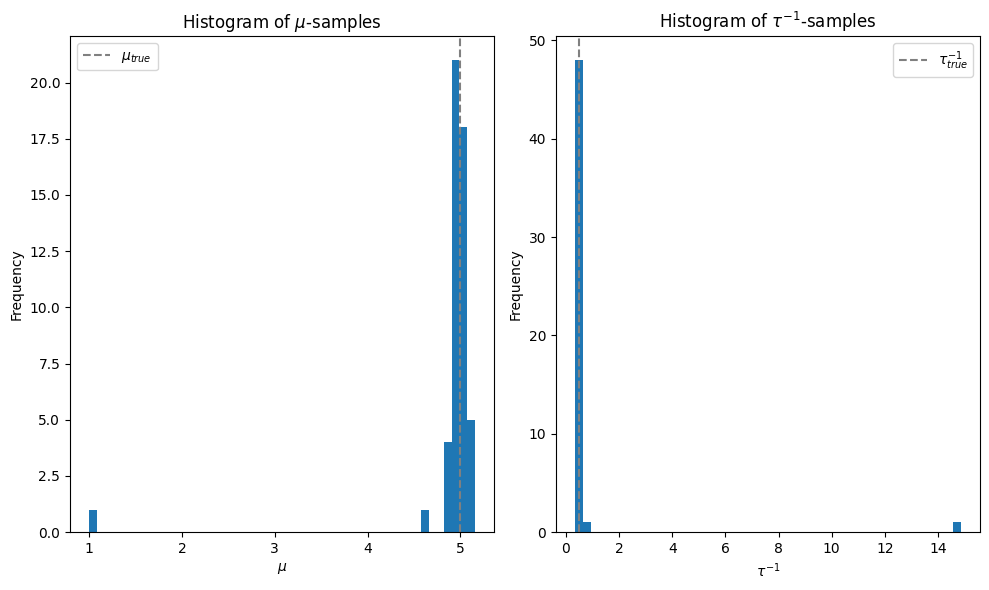

In [176]:
n_bins = 50

fig, axs = plt.subplots(1, 2, sharex=False, tight_layout=False, figsize=(10, 6))

# Left plot: mu_samples
axs[0].hist(mu_samples, bins=n_bins)
axs[0].axvline(mu_true, color='gray', linestyle='--', label="$\mu_{true}$")
axs[0].legend()
axs[0].set_title("Histogram of $\mu$-samples")
axs[0].set_xlabel("$\mu$")
axs[0].set_ylabel("Frequency")

# Right plot: 1/tau_samples
axs[1].hist(1 / tau_samples, bins=n_bins)
axs[1].axvline(sigma2_true, color='gray', linestyle='--', label="$\\tau^{-1}_{true}$")
axs[1].legend()
axs[1].set_title("Histogram of $\\tau^{-1}$-samples")
axs[1].set_xlabel("$\\tau^{-1}$")
axs[1].set_ylabel("Frequency")

plt.show()


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\542950811.py:4: SyntaxWarning: invalid escape sequence '\m'
  axs[0].axhline(mu_true, color='gray', linestyle='--', label="$\mu_{true}$")  # Add horizontal line
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\542950811.py:5: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title("Traceplot of $\mu$-samples")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\542950811.py:6: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel("$\mu$")


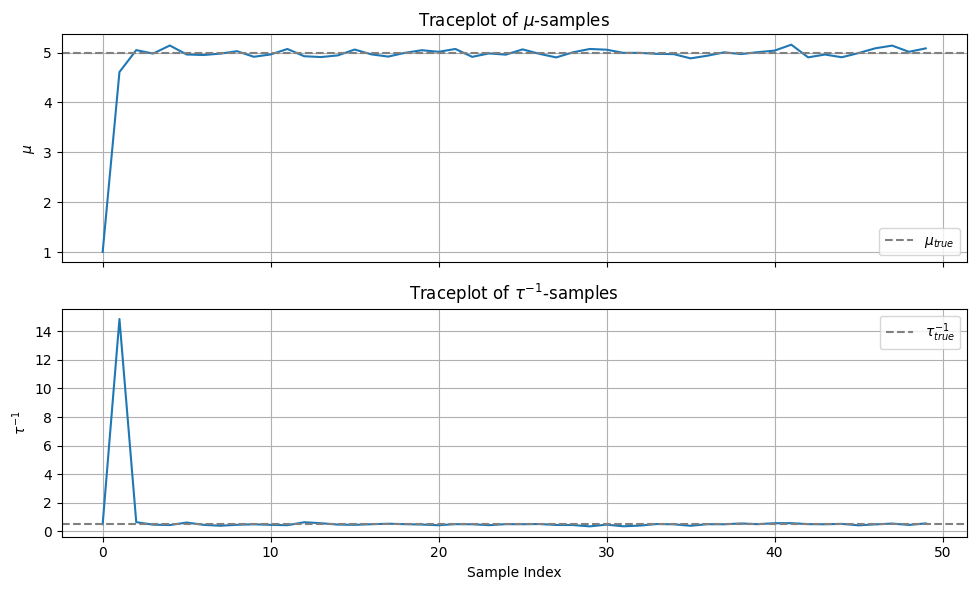

In [177]:

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6), tight_layout=True)

axs[0].plot(mu_samples)
axs[0].axhline(mu_true, color='gray', linestyle='--', label="$\mu_{true}$")  # Add horizontal line
axs[0].set_title("Traceplot of $\mu$-samples")
axs[0].set_ylabel("$\mu$")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(1/tau_samples)
axs[1].axhline(sigma2_true, color='gray', linestyle='--', label="$\\tau^{-1}_{true}$")  # Add horizontal line
axs[1].set_title("Traceplot of $\\tau^{-1}$-samples")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("$\\tau^{-1}$")
axs[1].legend()
axs[1].grid(True)

plt.show()


Implement the Gibbs sampler for poisson distibution in the following cell.

In [178]:
# Gibbs sampler
def gibbs_sampler_pois(initial_values, y, num_posterior_samples):
    n = len(y)
    mu_samples = np.zeros((num_posterior_samples, 1))
    beta_samples = np.zeros((num_posterior_samples, 1))
    mu_samples[0] = initial_values[0]
    beta_samples[0] = initial_values[1]

    # TODO: Implement the Gibbs sampler for Poisson distribution

    sum_y = np.sum(y)

    t = 0
    while (t+1) < num_posterior_samples:
        # for mu
        mu_posterior_sample = np.random.gamma(shape=2 + sum_y, scale=1/(n+beta_samples[t]))
        mu_samples[t+1] = mu_posterior_sample

        # for beta
        beta_posterior_sample = np.random.gamma(shape=3, scale=1/(1 + mu_samples[t+1]))
        beta_samples[t+1] = beta_posterior_sample

        t += 1

    return mu_samples, beta_samples

In [179]:
# Generate y values
n = 100 #sample size
true_param = 5
np.random.seed(4)
y_pois = np.random.poisson(true_param, n)

In [180]:
initial_values = [1,2]
num_posterior_samples = 100

mu_samples, beta_samples = gibbs_sampler_pois(initial_values, y_pois, num_posterior_samples)

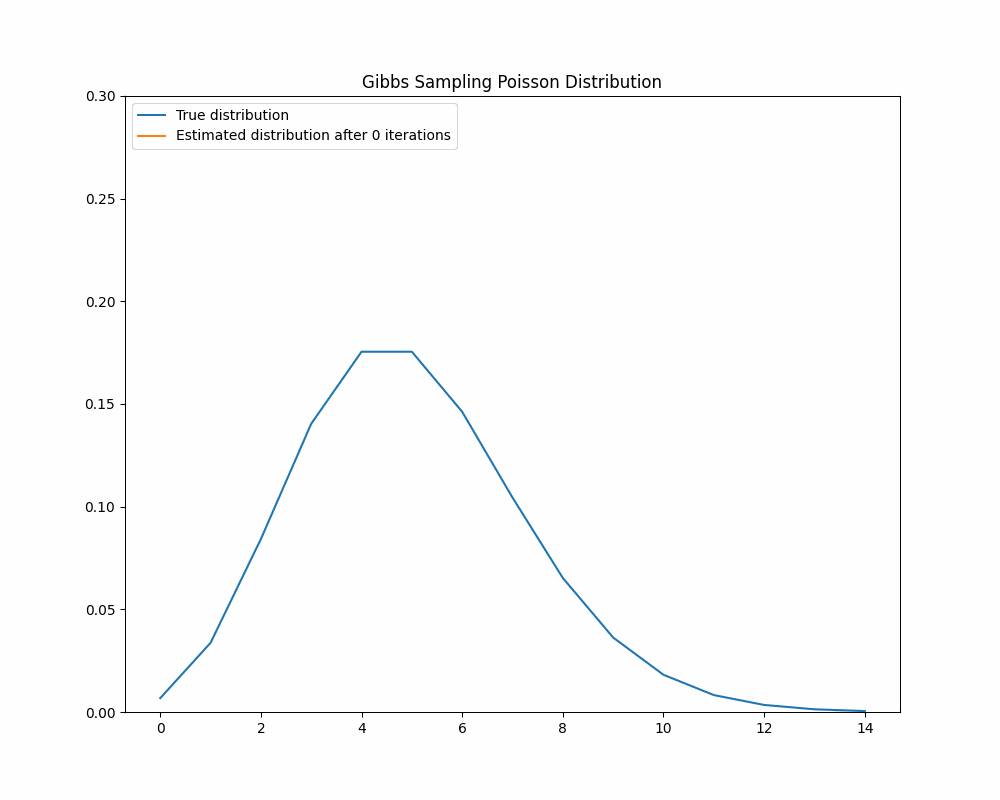

In [181]:
# Creating the gif
x = np.arange(0,15)
true_pdf = poisson.pmf(x, true_param)

frames = []
for num_samples in range(len(mu_samples)):
    mu = np.mean(mu_samples[:num_samples])
    estimated_pdf = poisson.pmf(x, mu)
    
    frame = plot_samples_normal(x, true_pdf, estimated_pdf, num_samples, title="Gibbs Sampling Poisson Distribution")
    frames.append(frame)

gif.save(frames, "gibbs_poisson.gif", duration=150)
Image(filename="gibbs_poisson.gif")

In [182]:
sample_mean_mu = np.sum(mu_samples)/len(mu_samples)
sample_mean_beta = np.sum(beta_samples)/len(beta_samples)

# posterior parameters
# from proof we have for 
# mu:
shape_mu = 2 + np.sum(y_pois)
rate_mu = n + sample_mean_beta
# from wikipeadia we have that mean of a gamma is:
theoretical_mean_mu = shape_mu / rate_mu

# same for beta:
shape_beta = 3
rate_beta = 1 + sample_mean_mu
theoretical_mean_beta = shape_beta / rate_beta

print(f"Mu: sample and theoretical mean for mu respectively: {sample_mean_mu}, {theoretical_mean_mu}")
print(f"Beta: sample and theoretical mean respectively: {sample_mean_beta}, {theoretical_mean_beta}")

Mu: sample and theoretical mean for mu respectively: 5.168425053904379, 5.212059213426847
Beta: sample and theoretical mean respectively: 0.5360796074836323, 0.48634780738741634


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\1261717775.py:7: SyntaxWarning: invalid escape sequence '\m'
  axs[0].axvline(true_param, color='gray', linestyle='--', label="$\mu_{true}$")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\1261717775.py:11: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title("Histogram of $\mu$-samples")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\1261717775.py:12: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_xlabel("$\mu$")


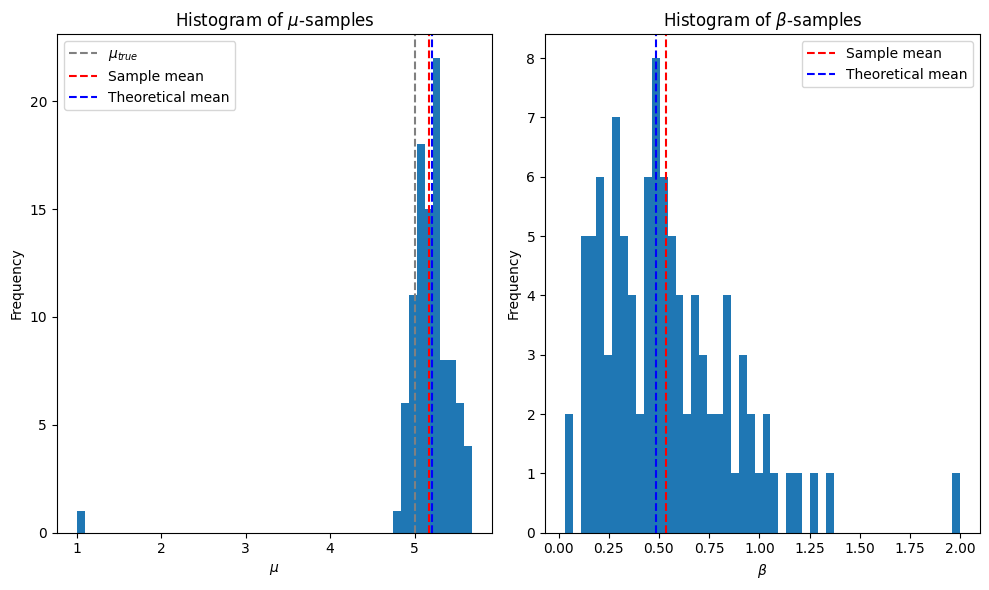

In [189]:
n_bins = 50

fig, axs = plt.subplots(1, 2, sharex=False, tight_layout=False, figsize=(10, 6))

# Left plot: mu_samples
axs[0].hist(mu_samples, bins=n_bins)
axs[0].axvline(true_param, color='gray', linestyle='--', label="$\mu_{true}$") 
axs[0].axvline(sample_mean_mu, color='red', linestyle='--', label="Sample mean") 
axs[0].axvline(theoretical_mean_mu, color='blue', linestyle='--', label="Theoretical mean") 
axs[0].legend()
axs[0].set_title("Histogram of $\mu$-samples")
axs[0].set_xlabel("$\mu$")
axs[0].set_ylabel("Frequency")

# Right plot: beta samples
axs[1].hist(beta_samples, bins=n_bins)
axs[1].axvline(sample_mean_beta, color='red', linestyle='--', label="Sample mean")
axs[1].axvline(theoretical_mean_beta, color='blue', linestyle='--', label="Theoretical mean")
axs[1].legend()
axs[1].set_title("Histogram of $\\beta$-samples")
axs[1].set_xlabel("$\\beta$")
axs[1].set_ylabel("Frequency")

plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\1497977640.py:5: SyntaxWarning: invalid escape sequence '\m'
  axs[0].axhline(true_param, color='gray', linestyle='--', label="$\mu_{true}$")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\1497977640.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title("Traceplot of $\mu$-samples")
C:\Users\Richa\AppData\Local\Temp\ipykernel_19872\1497977640.py:9: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel("$\mu$")


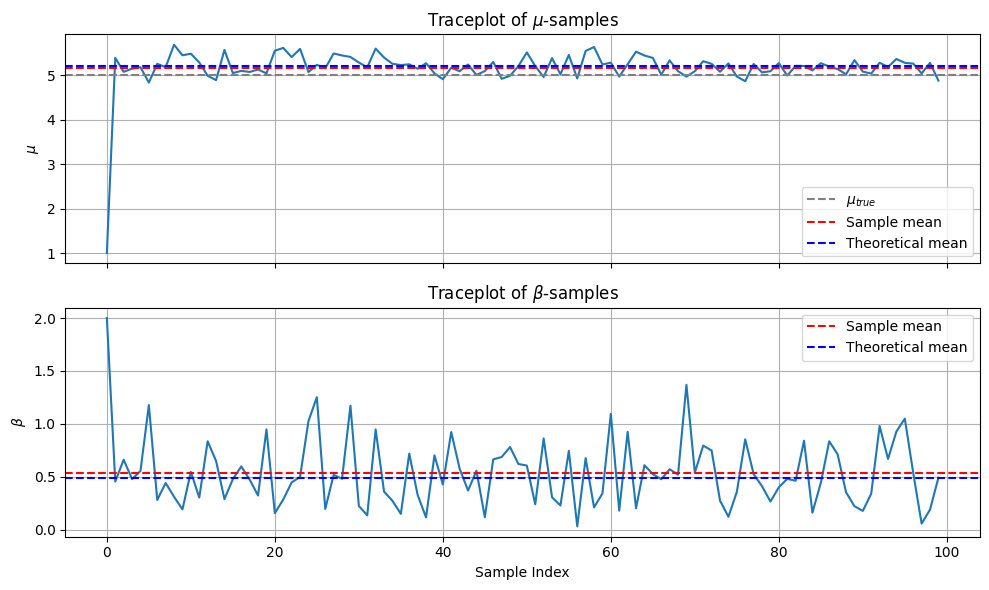

In [190]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6), tight_layout=True)


axs[0].plot(mu_samples)
axs[0].axhline(true_param, color='gray', linestyle='--', label="$\mu_{true}$") 
axs[0].axhline(sample_mean_mu, color='red', linestyle='--', label="Sample mean") 
axs[0].axhline(theoretical_mean_mu, color='blue', linestyle='--', label="Theoretical mean") 
axs[0].set_title("Traceplot of $\mu$-samples")
axs[0].set_ylabel("$\mu$")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(beta_samples)
axs[1].axhline(sample_mean_beta, color='red', linestyle='--', label="Sample mean")
axs[1].axhline(theoretical_mean_beta, color='blue', linestyle='--', label="Theoretical mean")
axs[1].set_title("Traceplot of $\\beta$-samples")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("$\\beta$")
axs[1].legend()
axs[1].grid(True)

plt.show()